In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [2]:
from sklearn.model_selection import train_test_split

data = load_iris()

features = data.data
labels = data.target

len(labels)

150

In [3]:
features[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Train set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")

Train set size: 120
Test set size: 30


In [5]:
model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



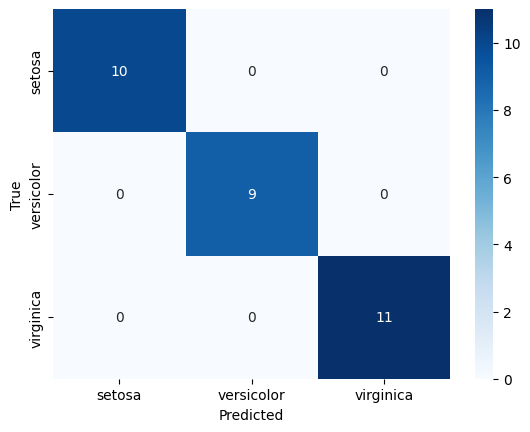

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_test, y_pred, target_names=data.target_names))

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Test other feature subsets and models

Feature 0: sepal length (cm)
              precision    recall  f1-score   support

      setosa       0.90      0.90      0.90        10
  versicolor       0.43      0.33      0.38         9
   virginica       0.62      0.73      0.67        11

    accuracy                           0.67        30
   macro avg       0.65      0.65      0.65        30
weighted avg       0.65      0.67      0.66        30



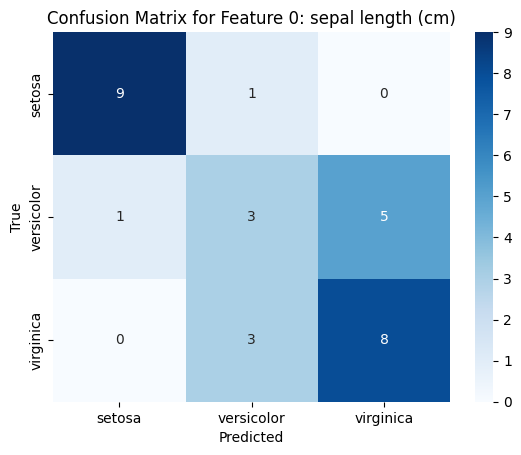



Feature 1: sepal width (cm)
              precision    recall  f1-score   support

      setosa       0.70      0.70      0.70        10
  versicolor       0.42      0.56      0.48         9
   virginica       0.50      0.36      0.42        11

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.54      0.53      0.53        30



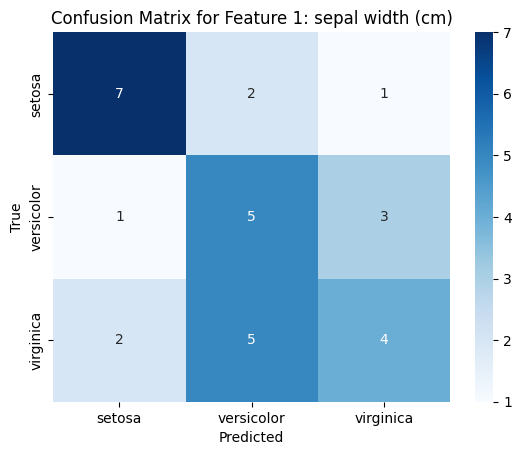



Feature 2: petal length (cm)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



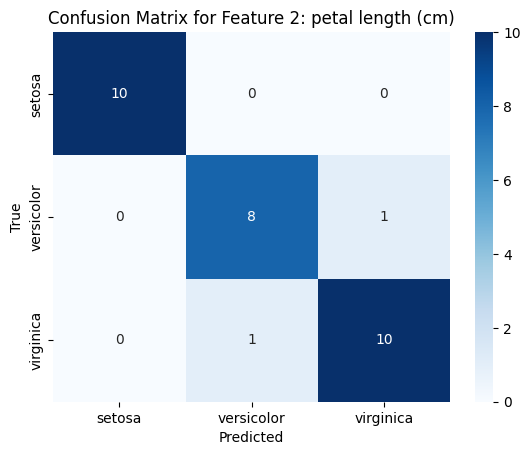



Feature 3: petal width (cm)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



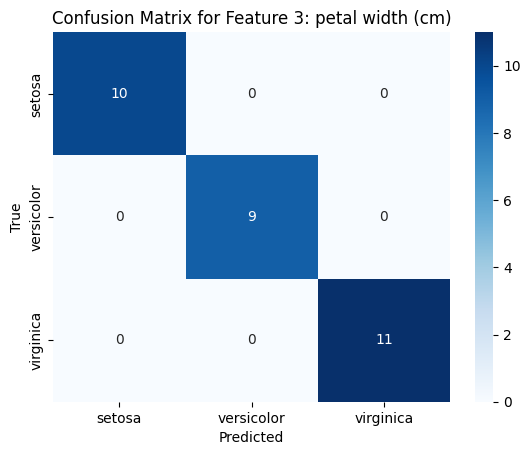

In [7]:
# Classify using 1 feature only
for i in range(4):
    single_feature = features[:, i]
    x_train, x_test, y_train, y_test = train_test_split(
        single_feature.reshape(-1, 1), labels, test_size=0.2, random_state=42
    )
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Feature {i}: {data.feature_names[i]}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for Feature {i}: {data.feature_names[i]}")
    plt.show()
    print("\n")

In [8]:
# Try other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

other_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, max_features=12),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=200),
}

In [9]:
# Use the full dataset again
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Model: Decision Tree
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



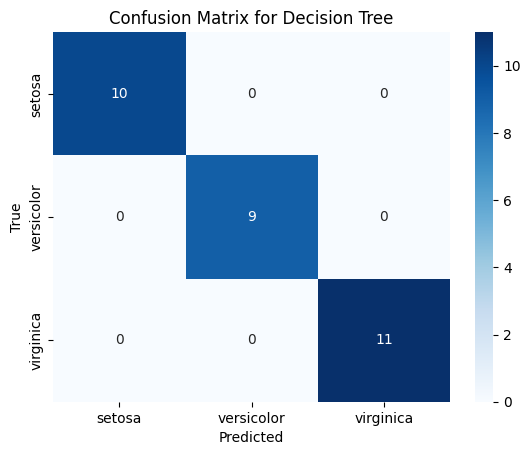

Model: SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



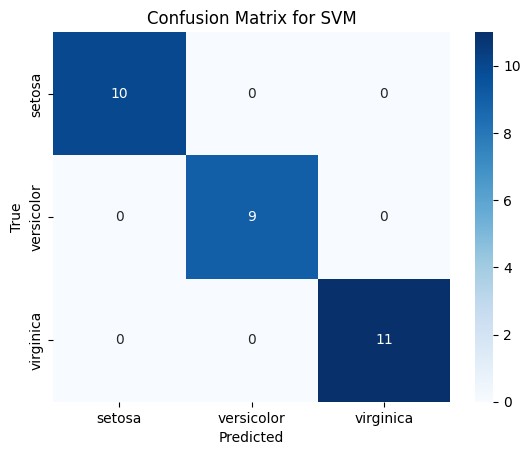

Model: Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



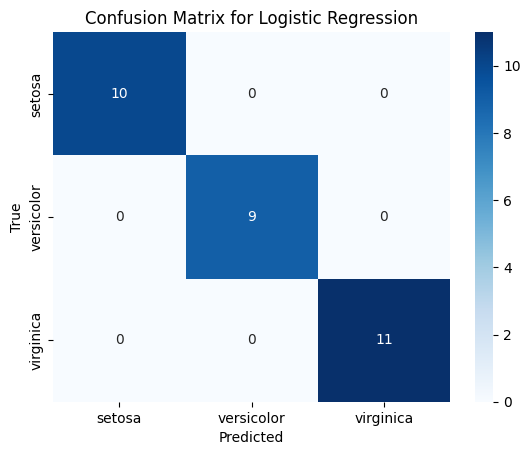

In [10]:
for model_name, model in other_models.items():
    print(f"Model: {model_name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [16]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

unsupervised_models = {
    "KMeans": KMeans(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
}

In [18]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Model: KMeans
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/home/lan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


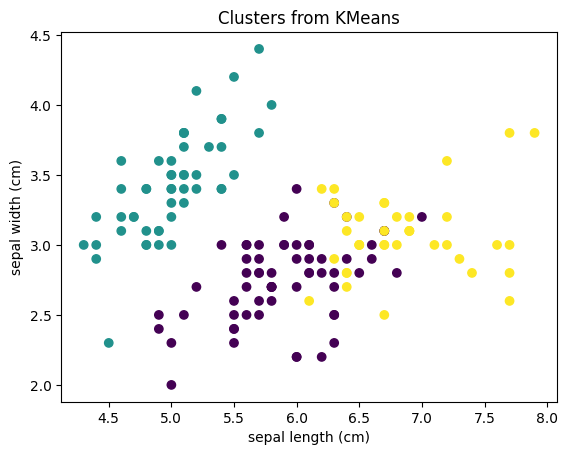

Model: DBSCAN
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


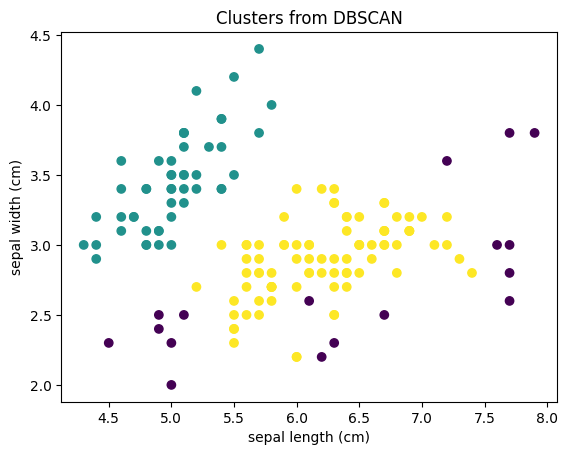

Model: Agglomerative Clustering
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


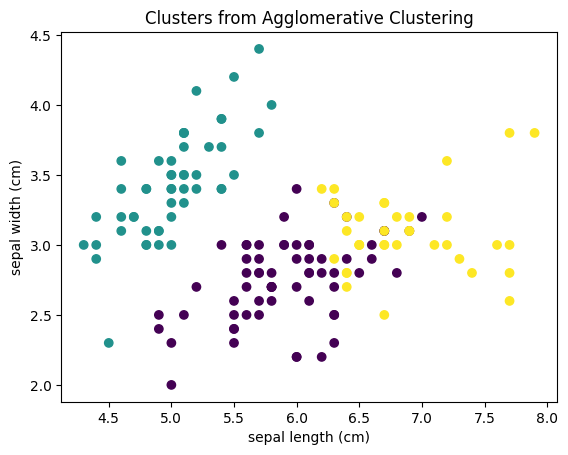

In [17]:
for name, model in unsupervised_models.items():
    print(f"Model: {name}")
    model.fit(features)
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(features)
    print(labels)
    # Note: For unsupervised models, we don't have true labels to compare against
    # So we won't be able to generate a classification report or confusion matrix
    # But we can visualize the clusters
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f"Clusters from {name}")
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.show()